# Gamma and Beta Distributions

So we have now met the following distributions.

For Discrete Distributions we learned that they can be specified by giving the probability distribution for each of the valid outputs. We met a few named distributions that cover common situations and also have sufficient structure that exact computations are possible:  Uniform Distribution, Bernouli Ditribution, Binomial Distribution, Geometric Distribution, and the Poisson Distribution. Note that the support of the Binomial Distribution is 0, 1, 2, ... n; the support of the Geometric and Poisson distributions are 0, 1, 2, ....

For Continuous Distributions we can specify them by giving the Cummulative Distribution Function or its derivative the Proability Density Function. We have met two named distributions again either they have enough structure that we can give exact answers or they fit common situations:  The uniform distribution, and the normal distribution. 

The uniform distribution has compact support on an interval $[a, b]$, while the nomral distribution has support on all real numbers. Note even so, provided $\sigma^2$ is small enough the likliehood that a normal distribution will return values far from $\mu$ is limited. 

However its not hard to imagine a probability distribution with other types of support. 

*Motivating Question*: Consider our Poisson Process from before. For example at a super market where on average 0.9 customers get in line at one of the checkout counters every minute. This fits our requirements for being a Poisson Process and so we expect the distribution of $N$ the number of customers that get in line each minute to fit our Poisson distribution:

$$ P(N= r) = \frac{0.9^r}{r!} e^{-0.9} $$


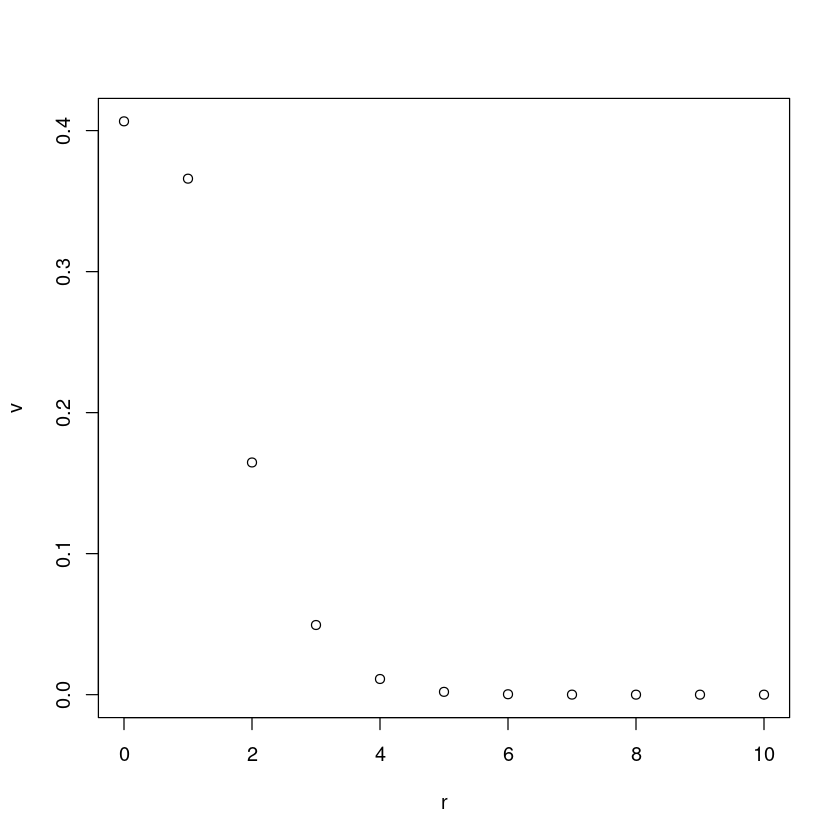

In [1]:
r <- c(0:10)
v <- dpois(r, 0.9)
plot(r, v)

## Exponential Distribution

A rather obvious question then is: after a customer gets in line, how many minutes $Y$ will it be before the next customer gets in line. What will the support of $Y$ be? Let's answer this for a general $\lambda$ and then set $\lambda = 0.9$.

To find a description for this distribution, lets consider what the cummulative distribution function looks like: Define $F(t) = P(Y\leq t) = \mbox{what is the probability that the next customer will appear within $t$ minutes}$

$$ P(Y \leq t ) = 1 - P(Y > t) $$

We can think of $P(Y>t)$ as the probability that in the time interval $[0, t]$ the Poisson process has not had a single event happen (no customer has been in line). If t=1 this is just 

$$ P(Y > 1) = P(N = 0) = e^{-\lambda} $$

Then notice that  

$$ P(Y > n) = P(N=0)^n = e^{-n \lambda} $$

i.e. for n time units the Poisson process has not had a single success.

and from here its not hard to convince yourself that 

$$ P( Y > t) = e^{-t \lambda} $$

We could even change the units and measure $t$ in seconds even though $\lambda$ is in customers/minute by just scaling the $\lambda$ by $1/60$ minutes/second.
Thus we have the CDF for our wait time until the first customer:

$$ F(t) = P( Y \leq t ) = 1 - e^{-t \lambda} $$

Differentiating this with respect to $t$ we get the PDF:

$$ f(t) = \lambda e^{-t \lambda} $$

This is called the **Exponential Distribution**:







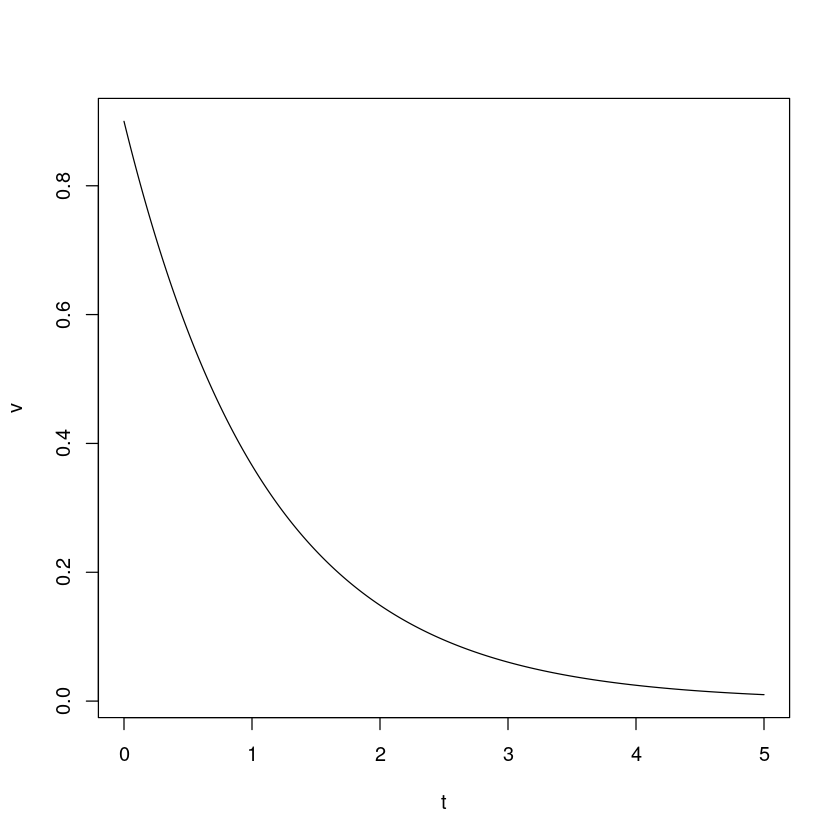

In [2]:
n <- 100
t <- c(0:(n*5))/n
v <- dexp(t, 0.9)
plot(t, v, type='l')

### Expected Value and Variance

The exponential distribution is a joy to work with - integrals are easily found using techniques from Calculus 2. For example the expected value:

$$ E(Y) = \int_0^\infty t \lambda e^{-t\lambda} dt = \frac{1}{\lambda} $$

Likewise:

$$ V(Y) = E(Y^2) - \frac{1}{\lambda^2} $$

With

$$ E(Y^2) = \int_0^\infty t^2 \lambda e^{-t\lambda} dt = \frac{2}{\lambda^2} $$

giving us

$$ V(Y) = \frac{1}{\lambda^2} $$

### When will the next customer arrive 95% of the time?

Find $a$ such that $P(Y < a) = 0.95$. 

The R command *qexp* gives the inverse exponential CDF. Using this we can find?

In [3]:
qexp(0.95, 0.9)

[1] 3.328591

We can check this result by putting it through the CDF function itself:

In [4]:
pexp(3.3286, 0.9)

[1] 0.9500004

### Effect of $\lambda$

As we increase $\lambda$, increasing the number of customers that arrive per minute, what should happen to the random variable $Y$?

## Gamma Distribution

Consider now the weight time for more two customers to get in line. As above the best way to compute this is to work from the CDF:

$$ P(Y_2 \leq t) = \mbox{The likliehood that we need to wait t or fewer minutes before two customers have arrived.} $$

As above, this is easiest to compute by finding the complement:

$$ P(Y_2 \leq t) = 1 - P(Y_2 > t) $$

and then we are asking how liklie is it that in t seconds we have not had two or more events from our Poisson process:

$$ P(Y_2 > t) = e^{-\lambda t} + \frac{(\lambda t)^1 e^{-\lambda t}}{1!} $$

Differentiating our CDF then gives the PDF:

$$ f(t) = \lambda e^{-\lambda t} - \lambda e^{-\lambda t} + \lambda^2 t e^{-\lambda t} = \lambda^2 t e^{-\lambda t} $$

In general the time until $k$ customers have arrived will have a PDF given by:

$$ f(t) = \frac{t^{k-1} \lambda^k e^{-\lambda t}}{(k-1)!} $$


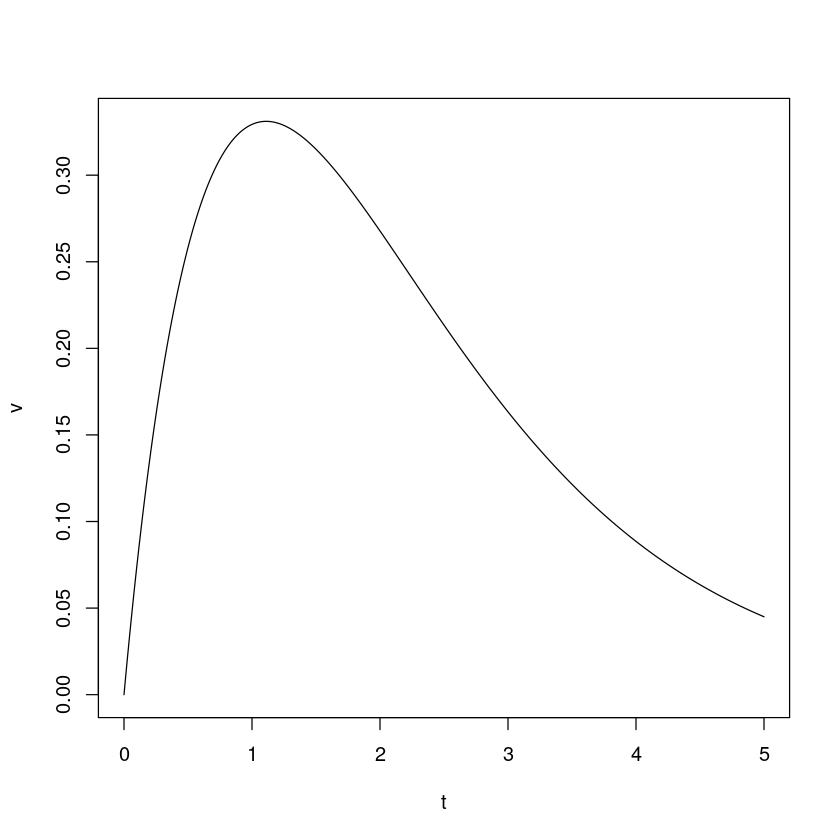

In [5]:
n <- 100
lambda <- 0.9
k <- 2
t <- c(0:(n*5))/n
v <- dgamma(t, rate = lambda, shape = k)
plot(t, v, type='l')

Note we specify the names of the parameters when we call *dgamma* this is because with two parameters it is easy to get the order backwards. If you set $k = 1$ you get back the exponential distribution so this formula is just a direct generalization of that distribution. 

### General Gamma Distribution

More generally the gamma distribution is defined by the PDF:

$$ f(x) = \frac{x^{\alpha - 1} e^{-x/\beta} }{\beta^{\alpha} \Gamma(\alpha)} $$

Where $\Gamma$ is defined by:

$$ \Gamma(\alpha) = \int_0^\infty x^{\alpha - 1} e^{-x} dx $$ 

The Gamma Function is quite famous: https://en.wikipedia.org/wiki/Gamma_function

However for our purposes you should think of it as doing two things:

- Together with $\beta^\alpha$ it gives precisely the constant needed so that the total mass of $f(x)$ is 1.
- When $\alpha$ is a positive integer:
$$ \Gamma(\alpha) = (\alpha - 1)! $$

Play with the parameters a bit in the graphs of the PDF and CDF to see what the effect on the shape is:


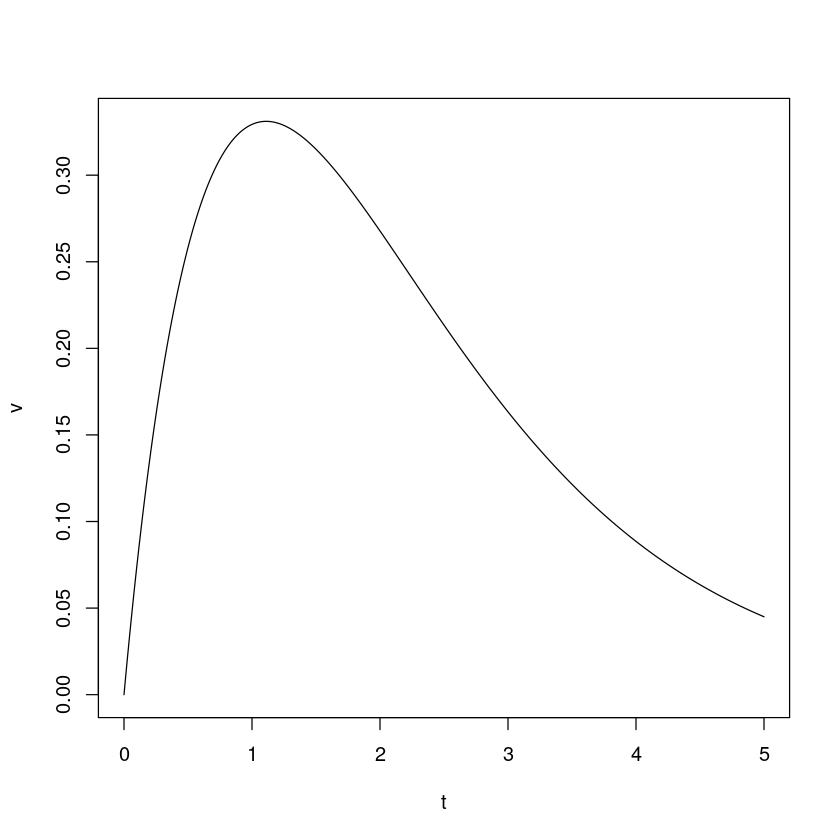

In [6]:
# Note that 1/\beta is the rate from above; in this case then $\beta$ is called the scale

n <- 100
beta <- 1/0.9
alpha <- 2
t <- c(0:(n*5))/n
v <- dgamma(t, scale = beta, shape = alpha)
plot(t, v, type='l')

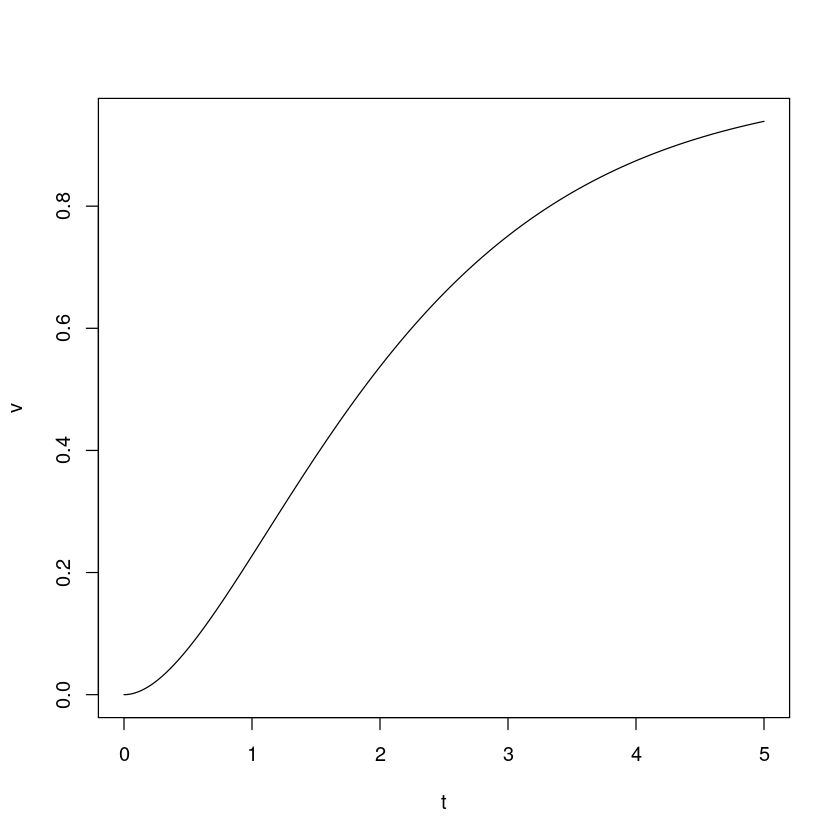

In [7]:
v <- pgamma(t, scale = beta, shape=alpha)
plot(t, v, type='l')

### Expected Value

We can compute the expected value of a random variable satisfying the Gamma Distribution with parameters $\alpha$ and $\beta$:

$$ E(Y) = \int_0^\infty x f(x) dx = \int_0^\infty x^\alpha e^{-x/\beta} \frac{dx}{\beta^\alpha \Gamma(\alpha) } $$

This is an interesting one as the variable part of the integrand has the form of another Gamma distribution this time with parameters $\alpha+1 $ and $\beta$ therefore, accepted that the normalizing constant is correct we get:

$$ E(Y) = \frac{\beta^{\alpha+1} \Gamma(\alpha+1)}{ \beta^\alpha \Gamma(\alpha)} = \alpha \beta $$

Where we have used the identity:  

$$ \Gamma(\alpha +1) = \alpha \Gamma(\alpha) $$

that can be shown with integration by parts.

### Variance 

We find the variance similarly by 

$$ E(Y^2) = \frac{\beta^{\alpha+2} \Gamma(\alpha+2) }{ \beta^\alpha \Gamma(\alpha) } = \alpha(\alpha+1) \beta^2 $$

Some algebra then gives:

$$ V(Y) = \alpha \beta^2 $$



## The Beta Distribution

Our final named distribution is the $\beta$ distribution. To motivate this distribution we return to our binomial distribution:  Suppose that we are running a webiste and find $k$ visitors who make a purchase and $\ell$ visitors who do not. We have an unkown probability $p$ that a visitor to the website makes a purchase. If you use the logic of our binomial distribution the likliehood of this outcome is then:

$$ p^k (1-p)^\ell $$

For the binomial distribution we would consider $k$ and $\ell$ to be the random variables (well more properly $k$ to be the random variable and $k+\ell$ to be a parameter. 

Suppose though that we flip our thinking on this problem and consider $k$ and $\ell$ to be the parameters and $p$ to be the random variable. After all we do not know what $p$ is and one way to deal with things we do not know is to think of them as random with some probability distribution. Formally, let's change variables to signify our change in thinking: $Y$ is the probability that our website converts a visitor into a sale. Note that the support of $Y$ must be $[0, 1]$ because it is a probability (or proportion). It's PDF is then:

$$ f(x) = \frac{ x^{\alpha-1} (1-x)^{\beta-1} }{B(\alpha, \beta)} $$ 

for $x\in [0,1]$, where 

$$ B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)} $$ 

Where $B$ is just chosen so that the total mass of $f(x)$ is 1. $\alpha-1$ and $\beta-1$ are playing the role of the number of success and the number of failures we have. Though more generally we would now think of them as parameters for the distribution.





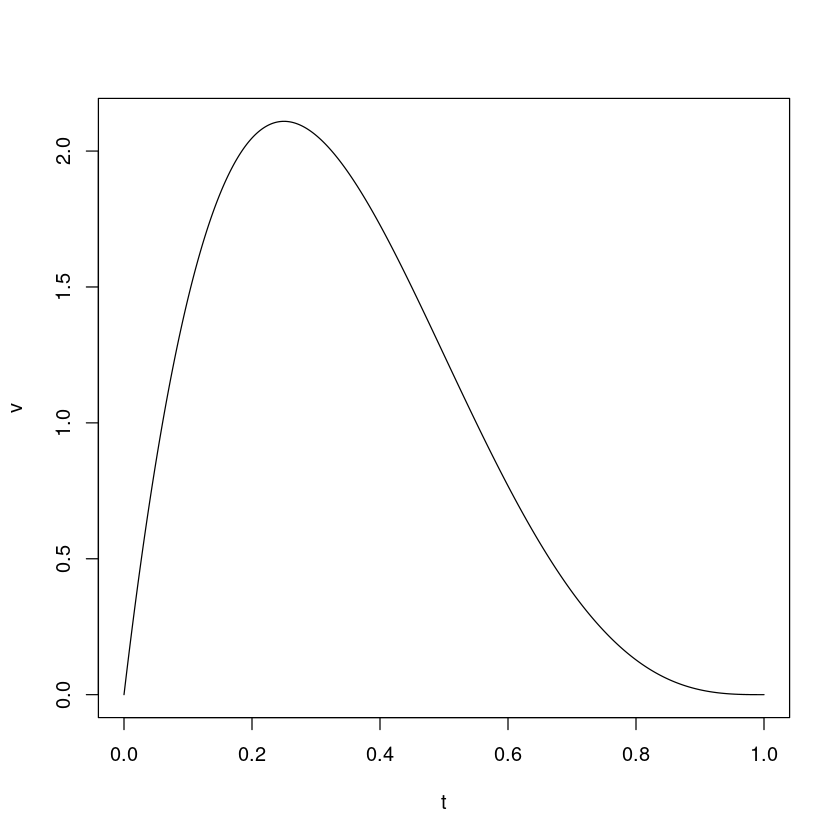

In [8]:
n <- 500
beta <- 4
alpha <- 2
t <- c(0:n)/n
v <- dbeta(t, shape1=alpha, shape2 = beta)
plot(t, v, type='l')

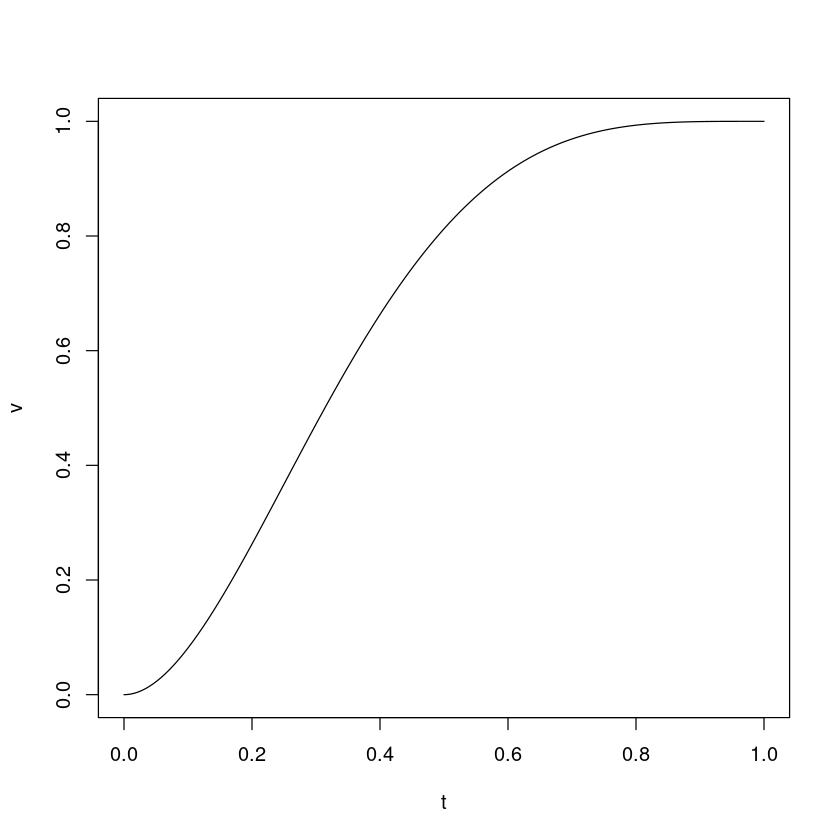

In [9]:
v <- pbeta(t, shape1=alpha, shape2 = beta)
plot(t, v, type='l')

Observe that the affect of $\alpha$ and $\beta$ are to adjust the likliehood that $Y$ is near 0 or 1 respectively. 

The PDF for this distribution is just a polynomial (granted with a complicated normalizing factor) and so it is particularly nice to work with because the integrals can be computed exactly.

### Expected Value

$$ E(Y) = \int_0^1 x f(x) dx = \int_0^1 x^\alpha (1-x)^{\beta -1} \frac{dx}{B} = \frac{\alpha}{\alpha + \beta} $$ 

### Variance

$$ V(Y) = E(Y^2) - \frac{\alpha^2}{(\alpha + \beta)^2 } $$

and 

$$ E(Y^2) = \int_0^1 x^{\alpha + 1} (1-x)^{\beta -1} \frac{dx}{B} $$

Okay. So I'll be honest. I would send this one through a symbolic algorithm unless I was doing it with numerical values of $\alpha$ and $\beta$.  In general we get:

$$ V(Y) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1) } $$

You can check this with mathematica or something else.



### Back to our example

So suppose our website in the first day it was running had $100$ visitors that were converted into a sale, and $3000$ visitors that did not make a sale. From this informatin alone we are 90% confident the value of $Y$ the probability that a visitor to our website will make a purchase is:

In [10]:
alpha = 100+1
beta = 3000 +1
qbeta(0.90, shape1=alpha, shape2=beta)

[1] 0.03670237

3.67% or less.

In [11]:
100/3000

[1] 0.03333333

Why is this result not exactly 3.33%?  It is taking into account randomness in the proportion, or if you flip your thinking, given a proportion $p$ the observed values were the result of a random experiment. 

We will return to this example later when we ask the question what can we do with additional data?